##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em; color:#0e92ea"> **Steven Gilbert Archuleta**

<font color='orange'>
&nbsp;
    


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> **Bank Churn Prediction** (AIML Project 07)</span></font>
  
<font color='orange'>

&nbsp;

Due: 20NOV2021 06:30 local time, 

Sacramento, California (PDT)

&nbsp;
[My GitHub Link for Project 7](https://github.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-may21-stevearchuleta)

***

###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Background and Context:**
  
<font color=darkblue>

&nbsp;
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

###  <span style="font-family: Arial; font-weight:bold;font-size:1m;color:#0e92ea"> **Objectives:**
<font color=darkblue>
&nbsp;
  
01. Explore and visualize the dataset.
02. Predict whether a bank customer will leave the bank within the next 6 months (or not)
03. Which features/variables are most significant?
04. Univariate & Bivariate Analysis.
05. Which segment of customers should be targeted more.
06. Address data imbalances
07. Create Dummies, Split Dataset (train,validation,test), Normalize data
08. Build Neural Network Model(s)
09. Evaluate accuracy scores, recall scores, precision, F1
10. Recursively improve model performance (find optimal thresholds / ROC curve)
11. Conclusions, Insights





***


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Data Dictionary (Raw CSV Data):**

<font color=darkblue>
&nbsp;
    
This dataset represents key attributes of the "Bank Churn" customer database from Kaggle.
 

The data provided denotes various customers of a bank and their attributes like: whether or not the customer left the bank within the past 6 months, tenure of customer relationship with the bank, customer age, credit score, bank balance, salary, etc...
    
    
The raw csv file contains the following variables:


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Attributes/Series/Features:


<font color=darkblue>

&nbsp;

[CustomerID](#1) -- Unique ID which is assigned to each customer

<font color=orange>


<br> 
    
<font color=darkblue> 
    
[Surname](#2) -- Last name of customer

<font color=orange>

    

<br>
    
<font color=darkblue>
    
[CreditScore](#3) -- Defines the credit history of the customer

<font color=orange>
460 unique integer values for 10,000 data objects (Range: 350 - 850)

<br>  
    
<font color=darkblue>  
    
[Geography](#4) -- Customer's location

<font color=orange>
3 unique string values for 10,000 data objects (France, Spain, Germany)
    
<br>    
    
<font color=darkblue>  
    
[Gender](#5) -- Gender of the customer

<font color=orange>
2 unique string values for 10,000 data objects (Male, Female)

<br> 
    
<font color=darkblue>
    
[Age](#6) -- Age of the customer

<font color=orange>
70 unique numeric values for 10,000 data objects

<br>  
    
<font color=darkblue>  
    
[Tenure](#7) -- Number of years the customer has been with the bank

<font color=orange>
11 unique numeric values for 10000 data objects (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

<br>  

<font color=darkblue>  
    
[Balance](#8) -- Account balance of customer

<font color=orange>
6382 unique float values for 10,000 data objects (0 - 250,898.09)

<br>  

<font color=darkblue>  
    
[NumOfProducts](#9) -- Total number of bank products purchased by customer 

<font color=orange>
4 unique numeric values for 10000 data objects ((1, 2, 3, 4)

<br>  

<font color=darkblue>  
    
[HasCrCard](#10) -- Whether or not the customer has a credit card

<font color=orange>
2 unique categorical values for 10000 data objects (1=has credit card; 0=does not have credit card)

<br>  

<font color=darkblue>  
    
[IsActiveMember](#11) -- Customer uses bank products regularly

<font color=orange>
2 unique categorical values for 10000 data objects (1=active, 0=inactive)

<br>  

<font color=darkblue>  
    
[EstimatedSalary](#12) -- Customer's Estimated Salary (yearly)

<font color=orange>
9999 unique string values for 10000 data objects (11.58 - 199,992.48)

<br>  

<font color=darkblue>  
    
[Exited](#13) -- (**TARGET VARIABLE**) Did the customer leave the bank in the past 6 months?

<font color=orange>
2 unique categorical values: 1=Yes, customer left bank; 0=No, customer did not leave bank

<br>  

<font color=darkblue>


[RowNumber](#0) -- Row Number for each customer data object

<font color=orange>

<br>  

***

<font color=orange>

## **1. IMPORT LIBRARIES AND PACKAGES** </font>

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# supress numerical display to 2 points of precision in scientific notation
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# remove the limit from the number of displayed columns and rows, so that the entire dataframe is visible and not truncated
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

***

<font color=orange>

## **2. IMPORT DATASET INTO GOOGLE COLAB** </font>

In [ ]:
# mount google drive (to access the file on my google drive)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive/Colab Notebooks/Project_7'
file = 'bank.csv'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Project_7


In [ ]:
# read dataset as a pandas dataframe
data = pd.read_csv(file)

# copy data to another varaible, df (to avoid any changes to original/raw dataset)
df = data.copy()
    
print(
    f"There are {df.shape[0]} data objects and {df.shape[1]} attributes/features in this Bank Churn dataset."
)

There are 10000 data objects and 14 attributes/features in this Bank Churn dataset.


***

##  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> **OVERVIEW OF DATASET** </span>

<font color=orange>
&nbsp;

3.  df Data Type     - pandas core frame dataframe
4.	Length        - number of data objects
5.	Shape           - (rows, columns) (data objects, attributes)
6.	Columns         - list of variable attributes
7.	List Comprehension  - column-based indexing integers for iloc() function
8.  Dictionary Comprehension - column-based key-value pairs
9.	Data Types   - value count of datatypes
10.	Info          - class, range index, data columns, data types, memory usage
11. Duplicated    - sum of duplicated data objects
12. Unique Values - number of unique values by column
13.	Null         - sum of missing values
14.  Head          - first 5 data objects
15.  Tail         - last 5 data objects
16. Sample(10)   - 10 random data objects  
17.	Describe        - five number summary of descriptive statistics
18. Describe       - include all; summary of categorical and numeric descriptive statistics 

<font color=orange>

## **3. Return the Pandas datatype for the dataframe named "df"**</font>

In [ ]:
type(df)

pandas.core.frame.DataFrame

***

<font color=orange>

## **4. Return the number of data objects for the dataframe named "df"**</font>

In [ ]:
len(df)

10000

***

<font color=orange>

## **5. Return the shape of the Pandas dataframe named "df"**</font>
    
<font color=#0e92ea>
      
###### OBSERVATION:</font>
    
    There are 14 attributes/series/features in this Bank Churn dataset

In [ ]:
df.shape

(10000, 14)

***



<font color=orange>

## **6. Return the column labels for the Pandas dataframe named "df"**</font>

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

***

<font color=orange>

## **7. Return a LIST COMPREHENSION that maps an index integer to the column label values for the Pandas dataframe named "df"**</font>   
    
NOTE: These index numbers may be used in the iloc() function if/when referencing multiple columns 

In [ ]:
# LIST COMPREHENSION - build a reference list of all columns and their indexes  (identify column name by index)

df_col_mapping_list = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
print(df_col_mapping_list)

['0:RowNumber', '1:CustomerId', '2:Surname', '3:CreditScore', '4:Geography', '5:Gender', '6:Age', '7:Tenure', '8:Balance', '9:NumOfProducts', '10:HasCrCard', '11:IsActiveMember', '12:EstimatedSalary', '13:Exited']


***

<font color=orange>

## **8. Return a DICTIONARY COMPREHENSION that maps a key integer to the column label values for the Pandas dataframe named "df"**</font>  
NOTE: These key numbers may be used to reference/access particular columns 

In [ ]:
# DICTIONARY COMPREHENSION - build a dictionary view of all columns and their indexes  (tool to rename columns, when needed)
df_col_mapping_dict = {c[0]: c[1] for c in enumerate(df.columns)}
print(df_col_mapping_dict)

{0: 'RowNumber', 1: 'CustomerId', 2: 'Surname', 3: 'CreditScore', 4: 'Geography', 5: 'Gender', 6: 'Age', 7: 'Tenure', 8: 'Balance', 9: 'NumOfProducts', 10: 'HasCrCard', 11: 'IsActiveMember', 12: 'EstimatedSalary', 13: 'Exited'}


***

<font color=orange>

## **9. Return a count of the datatypes for the column labels for the Pandas dataframe named "df"**</font>

    
<font color=#0e92ea>
      
###### OBSERVATION:</font>
    There are 9 int64 features, 3 object/string features, and 2 int64 features.

In [ ]:
df.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

***

<font color=orange>

## **10. Return a table that identifies the following "INFORMATION" about the Pandas dataframe named "df"**</font>

<font color=#0e92ea>

#### OBSERVABLE RETURN:</font>
######  10a: type of data structure, 
######  10b: range of data objects, 
######  10c: number of column label values, 
######  10d: column index #, 
######  10e: column label value, 
######  10f: non-null count, 
######  10g: datatype for each column label value, 
######  10h: count of series datatypes, 
######  10i: memory usage


 
&nbsp;
<font color=darkblue>     
###### **OBSERVATIONS:**</font>
* Datatypes: 10 of the features are numeric
* Non-Null: No features have missing values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***

<font color=orange>

## **11. Return the sum of duplicated data objects in the Pandas dataframe named "df1"**</font>
    
    
<font color=darkblue>     

###### **OBSERVATIONS:**</font>
* There are 0 duplicated data objects.
* There are 0 duplicate CustomerId
* **DROP:** RowNumber (no useable information)
* **DROP:** CustomerID (no useable information)
* **DROP:** Surname (no useable information)

In [ ]:
# 11.  Duplicates: explored herein... and below.

df.duplicated().sum()

0

In [ ]:
# 11. NO DUPLICATES
# 11. Obtain the count for each unique value in CustomerId

data_grouped = df.groupby("CustomerId").count()

print(data_grouped.head())

for i in data_grouped.loc[data_grouped.RowNumber >= 2].index:
    display(data.loc[df.CustomerId == i])

            RowNumber  Surname  CreditScore  Geography  Gender  Age  Tenure  \
CustomerId                                                                    
15565701            1        1            1          1       1    1       1   
15565706            1        1            1          1       1    1       1   
15565714            1        1            1          1       1    1       1   
15565779            1        1            1          1       1    1       1   
15565796            1        1            1          1       1    1       1   

            Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                      
15565701          1              1          1               1   
15565706          1              1          1               1   
15565714          1              1          1               1   
15565779          1              1          1               1   
15565796          1              1          1           

In [ ]:
# 11. Duplicates by last name
# MANY CUSTOMERS WITH THE SAME LAST NAME
# BUT... NO DUPLICATES...

# obtain the count for each unique value in CustomerId
# data_grouped = df.groupby("Surname").count()

# print(data_grouped.head())

# for i in data_grouped.loc[data_grouped.RowNumber >= 2].index:
    #display(data.loc[df.Surname == i])

***

In [ ]:
# 11.a 
# DROP RowNumber, CustomerId, and Surname
# Create df1 object

df1 = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [ ]:
# 11.a VERIFICATION (of dropped columns)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Verification (of df1 shape)
df1.shape

(10000, 11)

***

<font color=orange>

## **12. Return the number of unique values for each feature in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS for Unique Values:**</font>
* <span style='color:orange'>CREDIT SCORE: </span>  <span style="color:darkblue">There are 460 unique values unique values min: 350 to max: 850.
* <span style='color:orange'>GEOGRAPHY:  </span> <span style="color:darkblue"> There are 3 unique values (France, Germany, Spain).
* <span style='color:orange'>GENDER:  </span>  <span style="color:darkblue">There are 2 unique values (Male, Female).
* <span style='color:orange'>AGE:  </span> <span style="color:darkblue"> There are 70 unique values (18 - 92).
* <span style='color:orange'>TENURE:  </span>  <span style="color:darkblue">There are 11 unique values (0-10).
* <span style='color:orange'>BALANCE:  </span>  <span style="color:darkblue">There are 6382 unique values (0 - 250,898.09).
* <span style='color:orange'>NUMBER OF PRODUCTS:  </span>  <span style="color:darkblue">There are 4 unique values (1 - 4).
* <span style='color:orange'>HAS CREDIT CARD:  </span>  <span style="color:darkblue">There are 2 unique values (0, 1).
* <span style='color:orange'>IS ACTIVE MEMBER:  </span>  <span style="color:darkblue">There are 2 unique values (0, 1).
* <span style='color:orange'>ESTIMATED SALARY:  </span>  <span style="color:darkblue">There are 9999 unique values (11.58 - 199,992.48).
* <span style='color:orange'>**EXITED:**  </span>  <span style="color:darkblue">**There are 2 unique values (0, 1). Target Variable**

In [ ]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

<font color=orange>

## **12a. Return some unique() values**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Geography:</span>  <span style="color:darkblue">France, Spain, Germany
* <span style='color:orange'>Gender:</span>  <span style="color:darkblue">Male, Female
* <span style='color:orange'>Tenure:</span>  <span style="color:darkblue">2  1  8  7  4  6  3 10  5  9  0
* <span style='color:orange'>Number of Products:</span>  <span style="color:darkblue">1, 2, 3, 4
* <span style='color:orange'>Has Credit Card:</span>  <span style="color:darkblue">1, 0
* <span style='color:orange'>Is Active Member:</span>  <span style="color:darkblue">1, 0
* <span style='color:orange'>Exited:</span>  <span style="color:darkblue">1, 0

In [ ]:
# Return some unique values
# Please read observation above
# OBSERVATION: These are the unique values that will become the basis for the neural network algorithms.

print("GEOGRAPHY:", df1.Geography.unique())
print("\n\n")
print("GENDER:", df1.Gender.unique())
print("\n\n")
print("Tenure:", df1.Tenure.unique())
print("\n\n")
print("NUMBER OF PRODUCTS:", df1.NumOfProducts.unique())
print("\n\n")
print("HAS CREDIT CARD:", df1.HasCrCard.unique())
print("\n\n")
print("IS ACTIVE MEMBER:", df1.IsActiveMember.unique())
print("\n\n")
print("EXITED:", df1.Exited.unique())
print("\n\n")

GEOGRAPHY: ['France' 'Spain' 'Germany']



GENDER: ['Female' 'Male']



Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]



NUMBER OF PRODUCTS: [1 3 2 4]



HAS CREDIT CARD: [1 0]



IS ACTIVE MEMBER: [1 0]



EXITED: [1 0]





***

<font color=orange>

## **13. MISSING VALUES:  Return a table that identifies the sum of null values for each attribute in the Pandas dataframe named "df1"**</font> 
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Total Missing Values:</span>  <span style="color:darkblue">0

In [ ]:
# 12b
# Please read observations above
# print true or false for features with missing values

print(df1.isnull().any())

# print the numeric total of all missing values

print("\n")
print("Number of total missing values: ", df1.isnull().sum().sum())

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


Number of total missing values:  0


***

<font color=orange>

## **14. Return the first 5 data objects of the Pandas dataframe named "df1"**</font>

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***

<font color=orange>

## **15. Return the last 5 data objects of the Pandas dataframe named "df1"**</font>

In [ ]:
df1.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


***

<font color=orange>

## **16. Return a random sample of 10 data objects of the Pandas dataframe named "df1"**</font>

In [ ]:
df1.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
263,682,France,Female,26,0,110654.02,1,0,1,111879.21,0
8024,694,France,Male,30,10,144684.03,1,1,1,31805.49,0
5551,583,Germany,Female,26,10,72835.56,2,1,0,96792.15,0
5159,762,Spain,Female,69,9,183744.98,1,1,1,196993.69,0
3520,554,France,Female,43,10,0.00,2,1,0,149629.13,1
5037,606,Spain,Male,38,7,128578.52,1,1,1,193878.51,0
782,517,France,Male,41,2,0.00,2,0,1,75937.47,0
5478,648,Germany,Male,44,9,111369.79,2,1,1,91947.74,0
3614,558,Germany,Female,36,0,126606.63,2,1,1,172363.52,0
4878,793,Spain,Male,29,8,96674.55,2,0,0,192120.66,0


***

<font color=orange>

## **17. Return a table of aggragated "five number summary" values for the numeric attributes in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font> 
* <font color=orange>Credit Score:</font> <font color=#0e92ea>min=350, max=850, mean=650, median=652;</font>  <span style="color:darkblue"> mean = median; normal distribution.
*  <font color=orange>Age:</font> <font color=#0e92ea>min=18, max=92, mean=38.92, median=37;</font><span style="color:darkblue">mean > median; slightly right skewed; 75 percent of customers are 44 years old or lest; big difference between 3rd quartile and max suggests outliers. 
*  <font color=orange>Tenure:</font> <font color=#0e92ea>min=0, max=10, mean=5.01, median=5.0;</font><span style="color:darkblue"> mean = median; normal distribution.
*  <font color=orange>Balance:</font> <font color=#0e92ea>min=0, max=250,898.09, mean=76,485.89, median=97,198.54;</font> <span style="color:darkblue"> mean < median, left skewed data; at least 25% of customers have a zero balance. The standard deviation is very high. 
*  <font color=orange>Number of Products:</font> <font color=#0e92ea>min=1, max=4, mean=1.53, median=1;</font> <span style="color:darkblue">mean > median, slightly right skewed; 50% of customers only have 1 product.
*  <font color=orange>Estimated Salary:</font> <font color=#0e92ea>min=11.58, max=199,992.48, mean=100,090.24, median=100,193.92;</font> <span style="color:darkblue">mean < median, slightly left skewed; 25% of customers make less than 51K which is about 1/2 of the mean salary. The standard diviation is high; There are outliers.


In [ ]:
# Describe Numeric Features
# Please read the observations that are listed above

df1.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [ ]:
# Transposed
# Please read the observations that are listed above

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Transposed Summary of objects

df1.describe(include=["object"]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


***

<font color=orange>

## **18. Return the value count for select features in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>

* <span style='color:orange'>**EXITED:**</span> 1 (7963), 0 (2037) 
    
    20.4% of customers are have left the bank in the past 6 months.
    
* <span style="color:orange">**GEOGRAPHY:**</span> France (5014), Germany (2509), Spain(2477) 
    
    50.0% of customers are from France. 

* <span style='color:orange'>**GENDER:**</span> Male (5457), Female (4543) 
    
    45.4% of customers are female.    

* <span style='color:orange'>**IS ACTIVE MEMBER:**</span> 1 (5151), 0 (4849) 
    
    48.5% of customers are NOT active.

* <span style='color:orange'>**HAS CREDIT CARD:**</span> 1 (7055), 0 (2945) 
    
    Almost 30% of customers do NOT have credit cards.

* <span style='color:orange'>**IS ACTIVE MEMBER:**</span> 1 (5151), 0 (4849) 
    
    48.5% of customers are NOT active.

* <span style='color:orange'>**NUMBER OF PRODUCTS:**</span> 1 (5084), 2 (4590), 3 (266), 4 (60); 
    
    Less than 1% have 4 products with the bank; only 2.7% have 3 products.


* <span style='color:orange'>**TENURE:**</span> 2 (1048), 1 (1035), 7 (1028), 8 (1025), 5 (1012), 3 (1009), 4 (989), 9 (984), 6 (967), 10 (490), 0 (413)
    
    35.3% have been customers of the bank for 7 or more years; 25% have been customers of the bank for 2 or less years.

In [ ]:
features = set(df1.columns) - {'CreditScore', 'EstimatedSalary', 'Balance'}

# Value Counts (subtract out features with too many unique values)
# See observations above

for iterator in features:
    print("The unique values in", iterator, "are:")
    print(df1[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")

The unique values in HasCrCard are:
1    7055
0    2945
Name: HasCrCard, dtype: int64




The unique values in NumOfProducts are:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64




The unique values in Tenure are:
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64




The unique values in Age are:
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
59     62
60     62
61     53
21     53
62     52
63     40
20     40
67     37
64     37
66     35
19     27
71     27
18     22
69     22
72     21
68     19
74     18
70     18
65     18
73     13
76     

***

<font color=orange>

## **19. Return the count for EXITED (the target variable). Did the customer leave the bank in the past 6 months?**</font>
    
<font color=#0e92ea>
      
###### OBSERVATIONS:</font>
* <span style='color:orange'>**BAR PLOT COUNT** Exited:</span> 0=No, 1=Yes 
    
<span style="color:darkblue">7963 No, **2037 Yes**
    
<span style="color:darkblue">79.63% No, **20.37% Yes**

In [ ]:
# Counts for target variable
## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(df1["Exited"].value_counts(dropna=False))
print("\n")
print(df1["Exited"].value_counts(normalize=True) * 100)

0    7963
1    2037
Name: Exited, dtype: int64


0   79.63
1   20.37
Name: Exited, dtype: float64


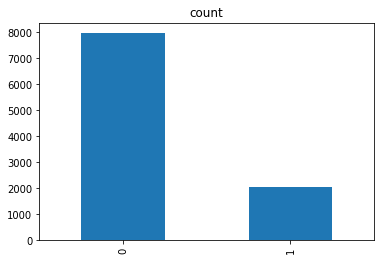

In [ ]:
# Bar plot for the zero (0=no) class and the one (1=yes) for the target variable
count = df1["Exited"].value_counts()
count.plot(kind="bar", title="count");

In [1]:
sns.countplot(x = "Geography", hue = "Exited", data=df1)

NameError: ignored

***

<font color=orange>

## **18. Return a histogram and boxplot for series attributes for the Pandas dataframe named "df1"**</font>
    
**OBSERVATIONS**
    

<font color=#0e92ea>
    
    
#### **18a. Credit Score** -- <span style='color:darkblue'>**OBSERVATION:** min=350, max=850, mean=650, median=652; mean = median; normal distribution. About 8 - 10 outliers under the 1st quartile, but not enought to drop.</span>
#### **18b. Age** -- <span style='color:darkblue'>**OBSERVATION:** min=18, max=92, mean=38.92, median=37;mean > median; slightly right skewed; 75 percent of customers are 44 years old or less; big difference between 3rd quartile and max suggests outliers; about 25 outliers.  At this point, I may keep them. More investigation will be completed below.</span>
#### **18c. Balance** -- <span style='color:darkblue'>**OBSERVATION:**   min=0, max=250,898.09, mean=76,485.89, median=97,198.54; mean < median, left skewed data; 36% of customers have a zero balance. I will not treat these as missing values. I will not treat these as outliers.</span>
#### **18d. Estimated Salary** -- <span style='color:darkblue'>**OBSERVATION:** min=11.58, max=199,992.48, mean=100,090.24, median=100,193.92; mean < median, slightly left skewed; 25% of customers make less than 51K which is about 1/2 of the mean salary. Still, every bin seems to be represented equally. The histogram is a rectangle, not a bell.</span>
#### **18e. Number of Products** -- <span style='color:darkblue'>**OBSERVATION:**  min=1, max=4, mean=1.53, median=1; mean > median, slightly right skewed; 50% of customers only have 1 product.</span>


In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<font color=#0e92ea>
    
#### **18a. Credit Score**</font>

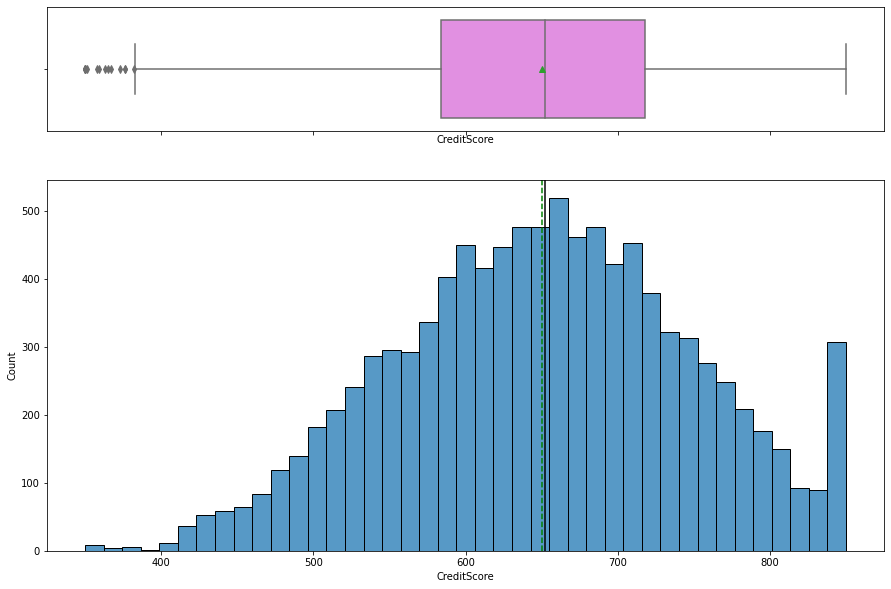

In [ ]:
# 18a
# Please read the observations above for 18a

histogram_boxplot(df1, "CreditScore")

In [ ]:
# 18a
# Return extreme values for credit score
df1[(df1.CreditScore < 365) | (df1.CreditScore > 850)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [ ]:
# Credit Score Value Counts (normalized)

df1.CreditScore.value_counts(normalize=True)

850   0.02
678   0.01
655   0.01
705   0.01
667   0.01
      ... 
419   0.00
417   0.00
373   0.00
365   0.00
401   0.00
Name: CreditScore, Length: 460, dtype: float64

<font color=#0e92ea>
    
#### **18b. Age**</font>

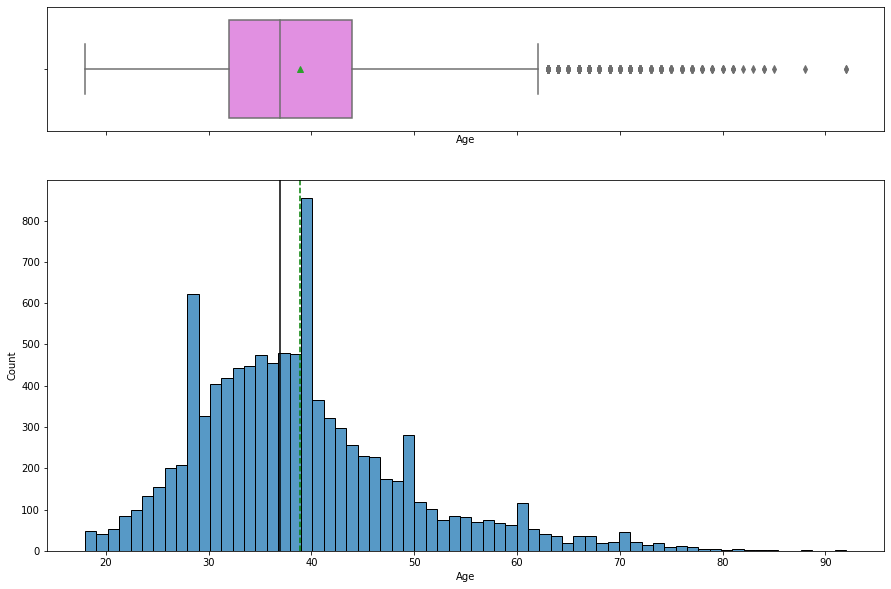

In [ ]:
# 18b
# Please read the observations above for 18b

histogram_boxplot(df1, "Age")

In [ ]:
# 18b
# Return extreme values for age
df1[(df1.Age < 18) | (df1.Age > 62)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [ ]:
# Age Value Counts (normalized)

df1.Age.value_counts(normalize=True)

37   0.05
38   0.05
35   0.05
36   0.05
34   0.04
33   0.04
40   0.04
39   0.04
32   0.04
31   0.04
41   0.04
29   0.03
30   0.03
42   0.03
43   0.03
28   0.03
44   0.03
45   0.02
46   0.02
27   0.02
26   0.02
47   0.02
48   0.02
25   0.02
49   0.01
50   0.01
24   0.01
51   0.01
52   0.01
23   0.01
54   0.01
22   0.01
55   0.01
57   0.01
53   0.01
56   0.01
58   0.01
59   0.01
60   0.01
61   0.01
21   0.01
62   0.01
63   0.00
20   0.00
67   0.00
64   0.00
66   0.00
19   0.00
71   0.00
69   0.00
18   0.00
72   0.00
68   0.00
74   0.00
70   0.00
65   0.00
73   0.00
76   0.00
77   0.00
75   0.00
78   0.00
79   0.00
81   0.00
80   0.00
84   0.00
92   0.00
88   0.00
82   0.00
85   0.00
83   0.00
Name: Age, dtype: float64

<font color=#0e92ea>
    
#### **18c. Balance**</font>

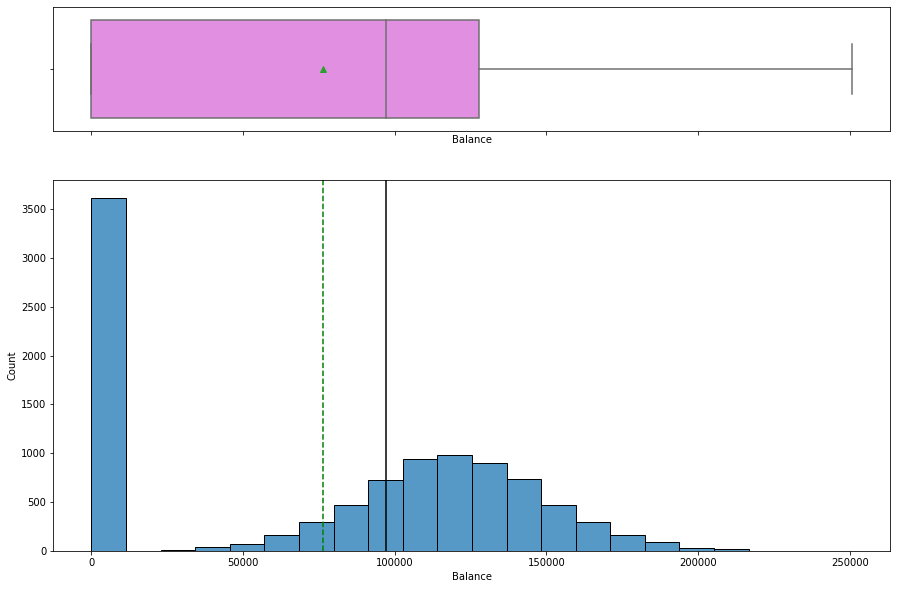

In [ ]:
# 18c
# Please read the observations above for 18c

histogram_boxplot(df1, "Balance")

In [ ]:
# Balance Value Counts (normalized)

df1.Balance.value_counts(normalize=True)

0.00        0.36
105473.74   0.00
130170.82   0.00
113063.83   0.00
80242.37    0.00
            ... 
183555.24   0.00
137648.41   0.00
112689.95   0.00
115465.28   0.00
74681.90    0.00
Name: Balance, Length: 6382, dtype: float64

<font color=#0e92ea>
    
#### **18d. Estimated Salary**</font>

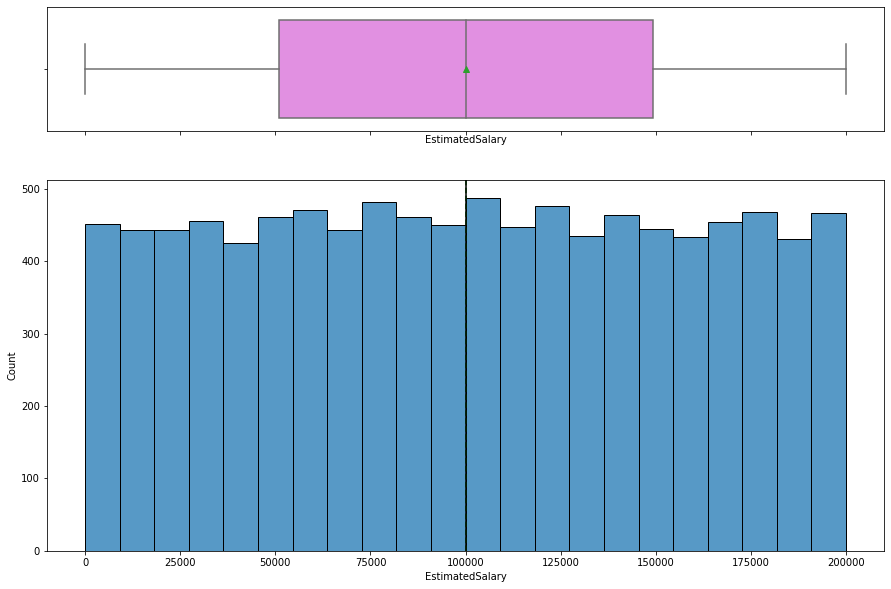

In [ ]:
# 18d
# Please read the observations above for 18d

histogram_boxplot(df1, "EstimatedSalary")

In [ ]:
# Estimated Salary Value Counts (normalized)

df1.EstimatedSalary.value_counts(normalize=True)

24924.92    0.00
109029.72   0.00
182025.95   0.00
82820.85    0.00
30314.04    0.00
            ... 
158302.59   0.00
171037.63   0.00
43036.60    0.00
55034.02    0.00
104181.78   0.00
Name: EstimatedSalary, Length: 9999, dtype: float64

<font color=#0e92ea>
    
#### **18e. Number of Products**</font>

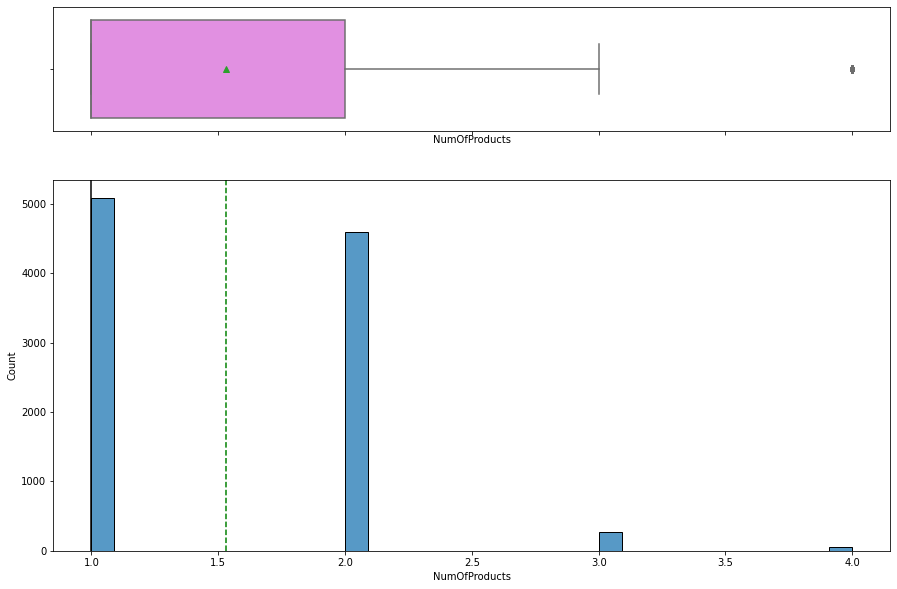

In [ ]:
# 18e
# Please read the observations above for 18e

histogram_boxplot(df1, "NumOfProducts")

In [ ]:
# 18e
# Return extreme values for number of products
df1[(df1.NumOfProducts < 1) | (df1.NumOfProducts > 3)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [ ]:
# Number of Products Value Counts (normalized)

df1.NumOfProducts.value_counts(normalize=True)

1   0.51
2   0.46
3   0.03
4   0.01
Name: NumOfProducts, dtype: float64

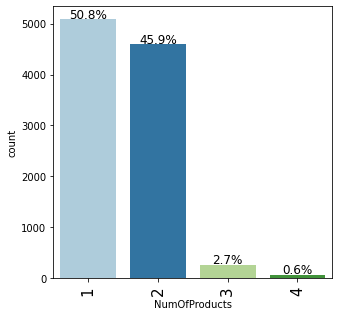

In [ ]:
labeled_barplot(df1, "NumOfProducts", perc=True)

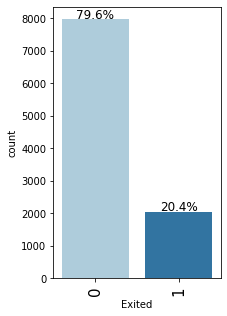

In [ ]:
# TARGET VARIABLE
labeled_barplot(df1, "Exited", perc=True)

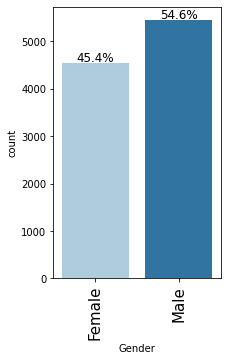

In [ ]:
labeled_barplot(df1, "Gender", perc=True)

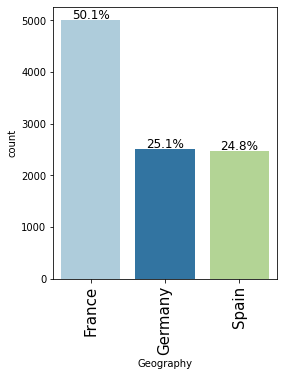

In [ ]:
labeled_barplot(df1, "Geography", perc=True)

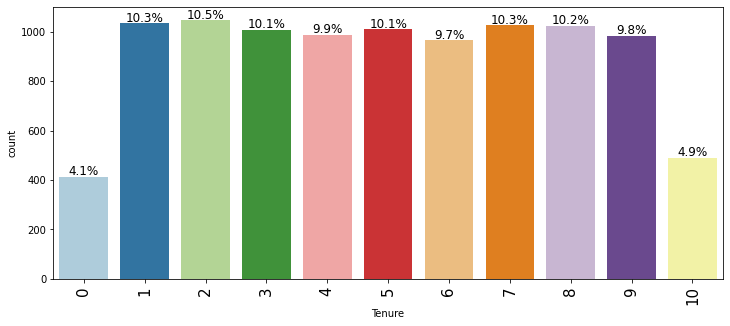

In [ ]:
labeled_barplot(df1, "Tenure", perc=True)

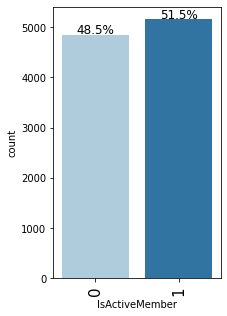

In [ ]:
labeled_barplot(df1, "IsActiveMember", perc=True)

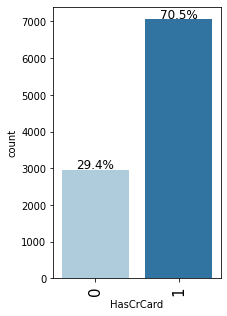

In [ ]:
labeled_barplot(df1, "HasCrCard", perc=True)

***

<font color=orange>

## **19. Estimator of the Cumulative Distribution Function: The ECDF plots a feature of the data from least to greatest, in order, and it visualizes the whole feature as if were distributed across the data set.**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Age, Credit Score, and Balance</span> follow the relatively same sigmoidal cumulative distribution curve from least to greatest. 
* <span style='color:orange'>Estimated Salary</span> follows a positive linear gradient for all income levels . 

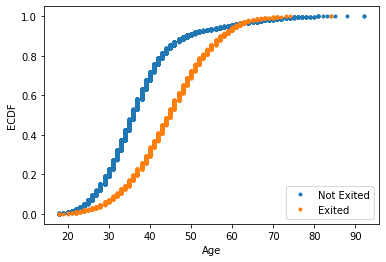

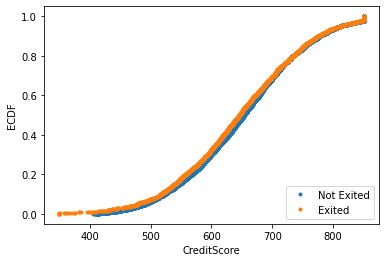

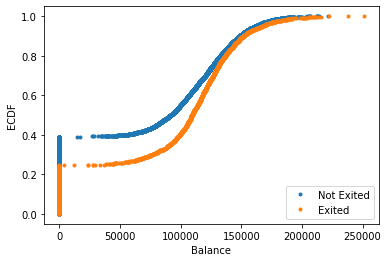

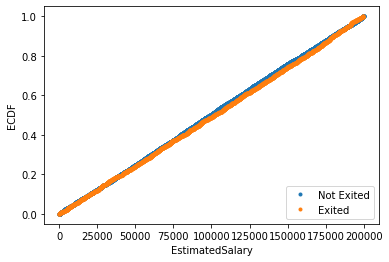

In [ ]:
def ecdf(df_arr):
    # number of data points
    n = len(df_arr)
    xvals = np.sort(df_arr)
    yvals = np.arange(1, n + 1) / n
    return xvals, yvals


for var in ["Age", "CreditScore", "Balance", "EstimatedSalary"]:
    tmpx, tmpy = ecdf(df1.loc[df["Exited"] == 0, var])
    t1, t2 = ecdf(df.loc[df1["Exited"] == 1, var])
    _ = plt.plot(tmpx, tmpy, marker=".", linestyle="none", label="Not Exited")
    _ = plt.plot(t1, t2, marker=".", linestyle="none", label="Exited")
    _ = plt.legend(("Not Exited", "Exited"), loc="lower right")
    _ = plt.xlabel(var)
    _ = plt.ylabel("ECDF")
    plt.show()

***

<font color=orange>

## **20. Return the pairwise correlation of all columns as well as a heatmap for the dataframe .**</font>

###### **OBSERVATIONS:**</font>
* <span style='color:#0e92ea'>UNRELATED FEATURES:</span> <span style='color:darkblue'>The features in this dataset all seem to be **unrelated to one another**</span>
* <span style='color:#0e92ea'>HIGHEST POSITIVE CORRELATION:</span> <span style='color:darkblue'>0.29 Age to Exited.</span>
* <span style='color:#0e92ea'>HIGHEST NEGATIVE CORRELATION:</span> <span style='color:darkblue'>-0.30 Balance to Number of Products. </span>

In [ ]:
df1.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


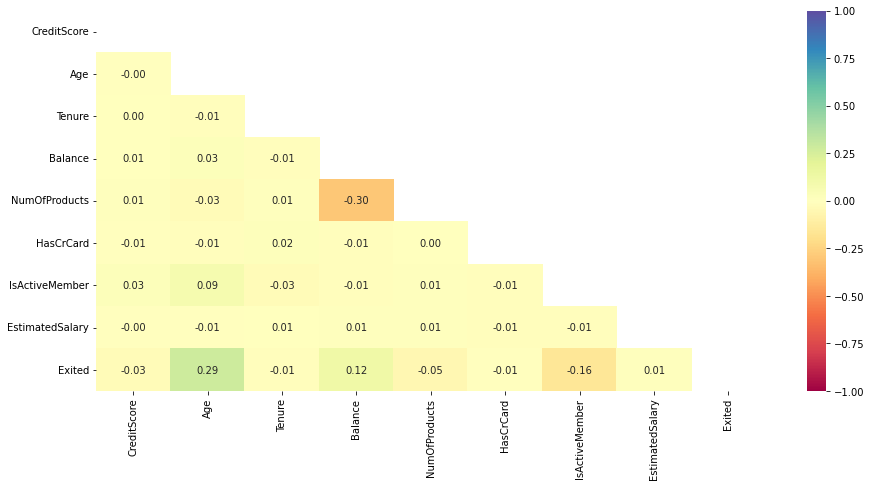

In [ ]:
plt.figure(figsize=(15, 7))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

***

<font color=orange>

## **21. Return a pairplot for for the dataframe**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Assumption of model algorithms:</font> <span style='color:darkblue'>All attributes exist independent of one another. </span>
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *NORMAL* Bell Curve Distributions:</font> <span style='color:darkblue'>*Credit Score* </span>
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *RIGHT* Skew Distributions:</font> <span style='color:darkblue'>*Age* </span>
 
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *LEFT* Skew Distributions:</font> <span style='color:darkblue'>None </span>    
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *BI-MODAL* Distributions:</font> <span style='color:darkblue'>*Balance*</span>     
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>Credit Score & Age:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Credit Score & Balance:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Credit Score & Estimated Salary:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Age & Balance</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Age & Estimated Salary:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Balance & Estimated Salary</font> <span style='color:darkblue'>Cloud-like Distribution</span>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Number of Products:</font> <span style='color:darkblue'>It appears as if customers with 3 or 4 products have exited at a much higher rate than other customers dispite any other feature metric.</span>   

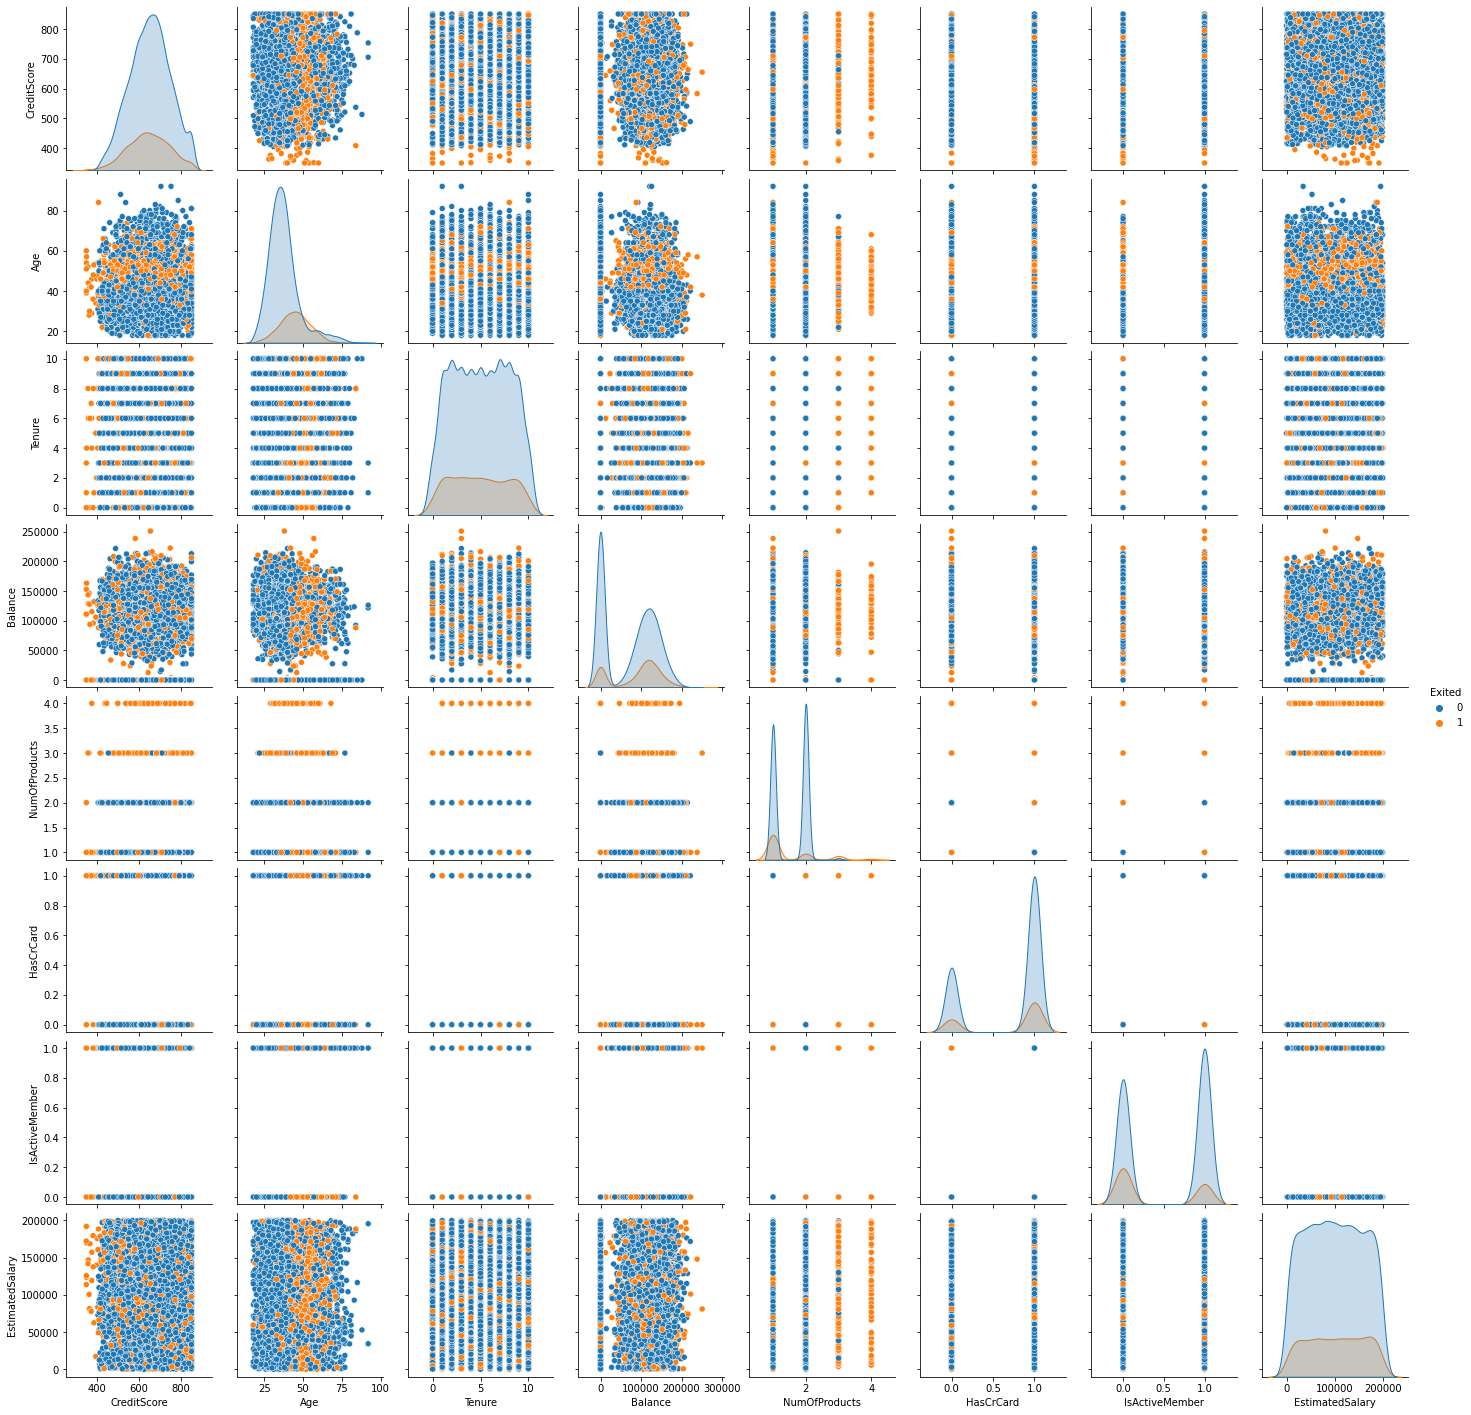

In [ ]:
# Please read observations above
sns.pairplot(data=df1, hue="Exited")
plt.show()

***

<font color=orange>

## **22. Return a boxplot to visualize continuous features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Age Median Value vs. Exited :</font> <span style='color:darkblue'>The median value for age in the customers who have exited is greater than the median value for age in the customers who have not exited.</span>   

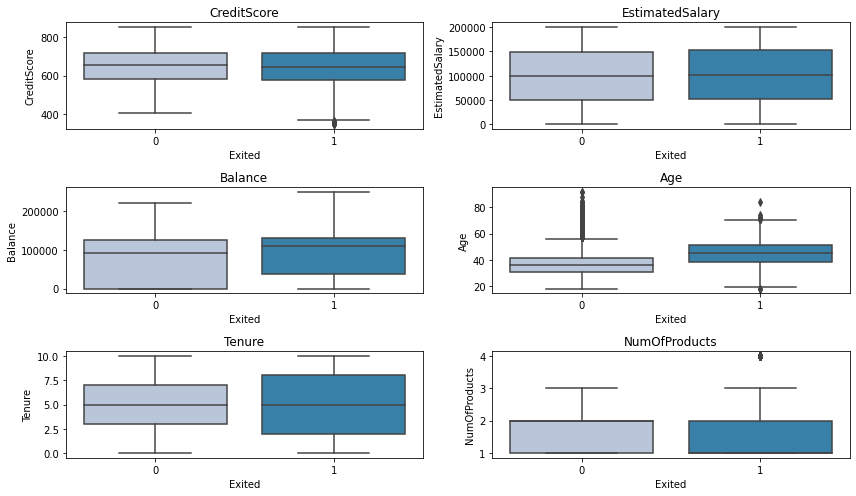

In [ ]:
cols = df1[
    [
        "CreditScore",
        "EstimatedSalary",
        "Balance",
        "Age",
        "Tenure",
        "NumOfProducts",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df1["Exited"], df1[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable);

***

<font color=orange>

## **23. Return a stacked barplot for descrete features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Exited **vs.** Gender:</font> <span style='color:darkblue'>Exited: 25% Females **vs.** 16.5% Males</span> 
* <font color=#0e92ea> Exited vs. Geography:</font> <span style='color:darkblue'>Exited: 32.4% Germans **vs.** 16.7% Spaniards **vs.** 16.2% French</span> 
* <font color=#0e92ea>Exited **vs.** Has Credit Card:</font> <span style='color:darkblue'>Exited: 20.8% Does not have Credit Card **vs.** 20.2% Has Credit Card</span> 
* <font color=#0e92ea>Exited **vs.** Is Active Member:</font> <span style='color:darkblue'>Exited: 26.9% Not Active Members **vs.** 14.3% Is Active Member</span>
* <font color=#0e92ea>Exited **vs.** Number of Products:</font></span> <span style='color:darkblue'>Exited: 100% 4 Products **vs.** 82.7% 3 Products **vs.** 27.7% 1 Product **vs.** 7.6% 2 Products</span>
* <font color=#0e92ea>Exited vs. Tenure:</font></span> <span style='color:darkblue'>The visual depicts all 11 categories hovering around the same (plus/minus) 20% exiting rate</span>

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


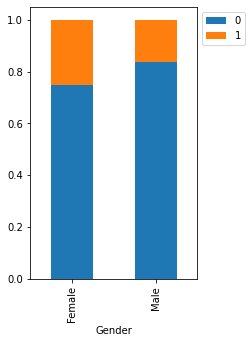

In [ ]:
stacked_barplot(df1, "Gender", "Exited")

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


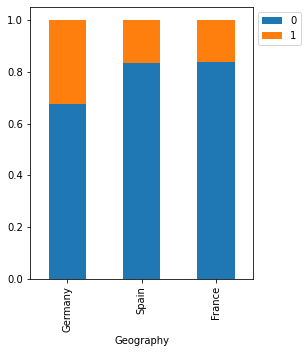

In [ ]:
stacked_barplot(df1, "Geography", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


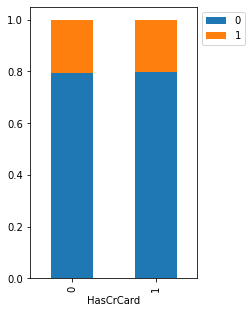

In [ ]:
stacked_barplot(df1, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


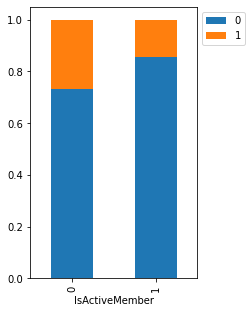

In [ ]:
stacked_barplot(df1, "IsActiveMember", "Exited")

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


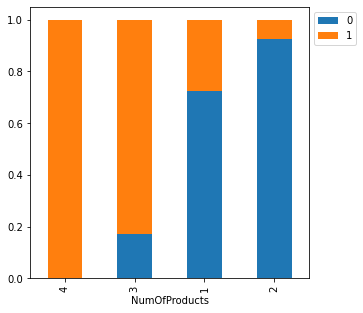

In [ ]:
stacked_barplot(df1, "NumOfProducts", "Exited")

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


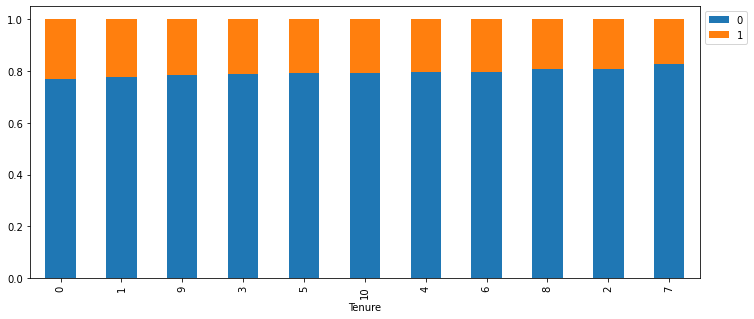

In [ ]:
stacked_barplot(df1, "Tenure", "Exited")

***

<font color=orange>

## **24. Return a lineplot for selected continuous features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Exited **vs.** Age:</font> <span style='color:darkblue'>40 y/o to 65 y/o customers tend to exit their relationships with the bank at a higher rate than any other age groups</span> 
* <font color=#0e92ea> Exited vs. Credit Score:</font> <span style='color:darkblue'>Credit Scores below 475 may exit at a slightly higher rate than others, but overall, a particular range of credit score does not indicate a higher or lower exit rate</span> 
* <font color=#0e92ea>Exited **vs.** Balance:</font> <span style='color:darkblue'>a particular range of account balance does not indicate a higher or lower exit rate</span> 
* <font color=#0e92ea>Exited **vs.** Estimated Salary:</font> <span style='color:darkblue'>a particular range of salary does not indicate a higher or lower exit rate</span>

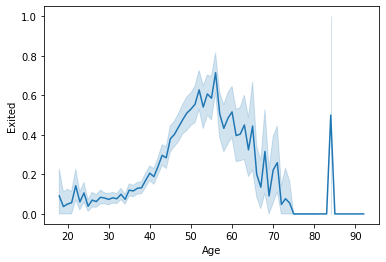

In [ ]:
sns.lineplot(x="Age", y="Exited", data=df1)

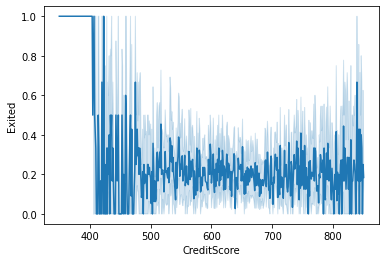

In [ ]:
sns.lineplot(x="CreditScore", y="Exited", data=df1)

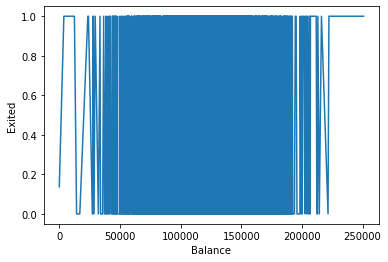

In [ ]:
sns.lineplot(x="Balance", y="Exited", data=df1)

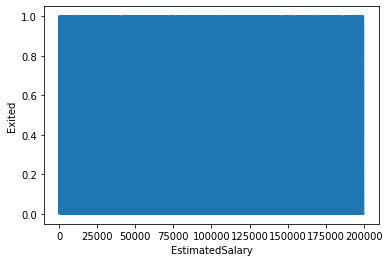

In [ ]:
sns.lineplot(x="EstimatedSalary", y="Exited", data=df1)

***

<font color=orange>

# **25a. Return a Grouped table of the mean CreditScore by whether or not the customer Exited**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>Lower Mean Credit Score: </font> There is a lower mean credit score for customers who have exited.
    
<span style="color:darkblue">Exited Credit Score (mean): **645.35**
    
<span style="color:darkblue">Not Exited Credit Score (mean): **651.85** 

In [ ]:
# 25a
df1.groupby("Exited").mean()["CreditScore"].sort_values(ascending=False)

Exited
0   651.85
1   645.35
Name: CreditScore, dtype: float64

<font color=orange>

# **25b. Return a Grouped table of the mean Balance by whether or not the customer Exited**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Balance: </font> There is a higher mean bank balance for customers who have exited than for those who have not exited.
    
<span style="color:darkblue">Exited Balance (mean): **91,108.54**
    
<span style="color:darkblue">Not Exited Balance (mean): **72,745.30** 

In [ ]:
# 25b
df1.groupby("Exited").mean()["Balance"].sort_values(ascending=False)

Exited
1   91108.54
0   72745.30
Name: Balance, dtype: float64

<font color=orange>

# **25c. Return a Grouped table of the mean Estimated Salary by whether or not the customer Exited**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Salary: </font> There is a higher mean salary for customers who have exited the bank than for those who have not exited.
    
<span style="color:darkblue">Exited Salary (mean): **101,465.68**
    
<span style="color:darkblue">Not Exited Salary (mean): **99,738.39** 

In [ ]:
# 25c
df1.groupby("Exited").mean()["EstimatedSalary"].sort_values(ascending=False)

Exited
1   101465.68
0    99738.39
Name: EstimatedSalary, dtype: float64

<font color=orange>

# **25d. Return a Grouped table of the mean Age by whether or not the customer Exited**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Age: </font> There is a higher mean age for customers who have exited the bank than for those who have not exited.
    
<span style="color:darkblue">Exited Age (mean): **44.84**
    
<span style="color:darkblue">Not Exited Age (mean): **37.41** 

In [ ]:
# 25d
df1.groupby("Exited").mean()["Age"].sort_values(ascending=False)

Exited
1   44.84
0   37.41
Name: Age, dtype: float64

<font color=orange>

# **25e. Return a Grouped table of the mean CreditScore by the customer's Geography**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>SAME: </font>All geographies have roughly the same average credit scores (France is a bit lower)
    
<span style="color:darkblue">Germany Mean Credit Score (mean): **651.45**
    
<span style="color:darkblue">Spain Mean Credit Score (mean): **651.33** 

<span style="color:darkblue">France Mean Credit Score (mean): **649.67** 

In [ ]:
# 25e
df1.groupby("Geography").mean()["CreditScore"].sort_values(ascending=False)

Geography
Germany   651.45
Spain     651.33
France    649.67
Name: CreditScore, dtype: float64

<font color=orange>

# **25f. Return a Grouped table of the mean Estimated Salary by the customer's Geography**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>Data: </font>No real meaningful information can be deciphered from this data
    
<span style="color:darkblue">Germany Salary (mean): **101,113.44**
    
<span style="color:darkblue">France Salary (mean): **99,899.18** 

<span style="color:darkblue">Spain Salary (mean): **99,440.57** 

In [ ]:
# 25f
df1.groupby("Geography").mean()["EstimatedSalary"].sort_values(ascending=False)

Geography
Germany   101113.44
France     99899.18
Spain      99440.57
Name: EstimatedSalary, dtype: float64

<font color=orange>

## **25g. Group data with respect to Germany and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 44.89

mean credit score = 647.69

mean balance = 120,361.08

mean tenure = 5.01 

mean salary = 98,403.89</span> 
 
* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span> 

In [ ]:
# 25g
df1[(df1["Geography"] == "Germany") & (df1["Exited"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,814.00,NaN,NaN,NaN,647.69,100.89,350.00,579.25,646.00,724.75,850.00
Geography,814,1,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,814,2,Female,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,814.00,NaN,NaN,NaN,44.89,9.56,19.00,39.00,45.00,51.00,74.00
Tenure,814.00,NaN,NaN,NaN,5.01,2.98,0.00,2.00,5.00,8.00,10.00
Balance,814.00,NaN,NaN,NaN,120361.08,19517.06,62389.03,107521.59,118951.22,132900.18,181461.48
NumOfProducts,814.00,NaN,NaN,NaN,1.45,0.80,1.00,1.00,1.00,2.00,4.00
HasCrCard,814.00,NaN,NaN,NaN,0.71,0.45,0.00,0.00,1.00,1.00,1.00
IsActiveMember,814.00,NaN,NaN,NaN,0.36,0.48,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,814.00,NaN,NaN,NaN,98403.89,58815.39,11.58,47055.06,96498.14,148684.43,199808.10


<font color=orange>

## **25h. Group data with respect to France and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 45.13

mean credit score = 641.91

mean balance = 71,192.80

mean tenure = 5.00 

mean salary = 103,439.28</span> 
 
* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span> 

In [ ]:
# 25h
df1[(df1["Geography"] == "France") & (df1["Exited"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,810.00,NaN,NaN,NaN,641.91,100.15,350.00,570.00,643.50,710.00,850.00
Geography,810,1,France,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,810,2,Female,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,810.00,NaN,NaN,NaN,45.13,9.77,18.00,38.00,45.00,52.00,84.00
Tenure,810.00,NaN,NaN,NaN,5.00,2.95,0.00,2.00,5.00,8.00,10.00
Balance,810.00,NaN,NaN,NaN,71192.80,66894.12,0.00,0.00,80376.46,128995.29,238387.56
NumOfProducts,810.00,NaN,NaN,NaN,1.48,0.82,1.00,1.00,1.00,2.00,4.00
HasCrCard,810.00,NaN,NaN,NaN,0.70,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,810.00,NaN,NaN,NaN,0.37,0.48,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,810.00,NaN,NaN,NaN,103439.28,57497.15,123.07,55781.09,103739.24,154718.75,199378.58


<font color=orange>

## **25i. Group data with respect to Spain and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 44.15

mean credit score = 647.48

mean balance = 72,513.35

mean tenure = 4.66 

mean salary = 103,629.55</span> 
 
* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span> 

In [ ]:
# 25i
df1[(df1["Geography"] == "Spain") & (df1["Exited"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,413.00,NaN,NaN,NaN,647.48,99.58,350.00,584.00,649.00,717.00,850.00
Geography,413,1,Spain,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,413,2,Female,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,413.00,NaN,NaN,NaN,44.15,10.13,18.00,37.00,44.00,51.00,71.00
Tenure,413.00,NaN,NaN,NaN,4.66,2.81,0.00,2.00,5.00,7.00,10.00
Balance,413.00,NaN,NaN,NaN,72513.35,66903.28,0.00,0.00,79035.95,127660.46,250898.09
NumOfProducts,413.00,NaN,NaN,NaN,1.51,0.78,1.00,1.00,1.00,2.00,4.00
HasCrCard,413.00,NaN,NaN,NaN,0.67,0.47,0.00,0.00,1.00,1.00,1.00
IsActiveMember,413.00,NaN,NaN,NaN,0.34,0.47,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,413.00,NaN,NaN,NaN,103629.55,56792.38,417.41,57338.56,108732.96,152567.75,199304.74


<font color=orange>

## **25j. CUSTOMER PROFILE**</font>

###### **EXITED CUSTOMERS BY GEOGRAPHY  (mean values):**
    
GEOGRAPHY | GENDER | AGE | CREDIT SCORE | BALANCE | TENURE | SALARY
----------|--------|-----|--------------|---------|--------|-------
Germany   | Female |44.89|    647.69    | 120,361.08|5.01|98,403.89
France    | Female |45.13|    641.91    |  71,192.80|5.00|103,439.28
Spain     | Female |44.15|    647.48    |  72,513.35|4.66|103,629.55



***

<font color=orange>

# **26. PAUSE... Check the overall percentage of each target class in the dataset (Percentage of Exited vs. Percentage Not Exited)**</font>
 
 ###### **OBSERVATIONS:**
* <font color=orange>DATA IMBALANCE: </font>The dataset is 80/20, **NOT 98/2**, still, there is a data imbalance. After building and validating model, use a SMOTE oversampling/upsampling technique with this dataset.
    


In [ ]:
# 26
(df1.Exited.value_counts())/(df1.Exited.count())

0   0.80
1   0.20
Name: Exited, dtype: float64

***

<font color=orange>

## **27. Bank Balance Losses Due To Exited Customers**</font> 

###### **OBSERVATIONS:**
    
<span style='color:#0e92ea'>**$185,588,094.63** which equates to **24.3%** of combined total customer balances.</span>

In [ ]:
print("*********Bank Balances Lost due to Exited Customers:************\n")
print("Total balances lost to exited customers")
print(df1.Balance[df1.Exited == 1].sum())
print('\n')
print("Mean balance per exited customer")
print(df1.Balance[df1.Exited == 1].mean())
print('\n')
print("Compare balance to non-exited customers:")
print('\n')
print("Total balances from non-exited customers")
print(df1.Balance[df1.Exited == 0].sum())
print('\n')
print("Mean balance per non-exited customer")
print(df1.Balance[df1.Exited == 0].mean())
print('\n')
print("Percentage of exited balances and percentage of non-exited balance (relative to combined total balances):")
print('Percent of Exited Balance to Total Balance:', df1.Balance[df1.Exited == 1].sum() / (df1.Balance[df1.Exited == 0].sum() + df1.Balance[df1.Exited == 1].sum()))
print('Percent of Non-Exited Balance to Total Balance:', df1.Balance[df1.Exited == 0].sum() / (df1.Balance[df1.Exited == 0].sum() + df1.Balance[df1.Exited == 1].sum()))

*********Bank Balances Lost due to Exited Customers:************

Total balances lost to exited customers
185588094.63


Mean balance per exited customer
91108.53933726063


Compare balance to non-exited customers:


Total balances from non-exited customers
579270798.25


Mean balance per non-exited customer
72745.29677885193


Percentage of exited balances and percentage of non-exited balance (relative to combined total balances):
Percent of Exited Balance to Total Balance: 0.24264357302715864
Percent of Non-Exited Balance to Total Balance: 0.7573564269728413


***

<font color=orange>

## **28. Copy Dataframe**</font> 

###### **OBSERVATIONS:**
    
<span style='color:#0e92ea'>copy df1 prior to splitting and making models</span>

In [ ]:
df2 = df1.copy()

***

<font color=orange>

## **28. Separate the data into Dependent and Independent Variables (Response Variable and Predictors)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>X variables</font> <span style='color:darkblue'>Isolate all of the independent variables, **predictors**, which possess the data that will be used to make predictions. </span>
    
* <font color=#0e92ea>y variable</font> <span style='color:darkblue'>Isolate **Exited** as the y variable -- the target variable, the response variable -- that has the data which will be predicted. </span>

In [ ]:
# 28
X = df2.drop(["Exited"], axis=1)
y = df2["Exited"]

***

<font color=orange>

## **29. Split the data into a TEST SET and a TEMPORARY SET**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>TEST SET</font> <span style='color:darkblue'>The test set will be reserved away from the Deep Nural Network model as unseen data, until the model has sufficient performace scores such that the final model can be used to make predictions on the test set data.</span>
* <font color=#0e92ea>TEMPORARY SET</font> <span style='color:darkblue'>The temporary set will become a training set and a validation set</span>

In [ ]:
# 29
# OBSERVATION: The temp set will become a train set and a validation set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

***

<font color=orange>

## **30. Split the TEMPORARY SET into a TRAINING SET and a VALIDATION SET**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>TRAINING SET</font> <span style='color:darkblue'>The Deep Neural Network model will be built with the Training Set Data.</span>
* <font color=#0e92ea>VALIDATION SET</font> <span style='color:darkblue'>The Hyperparameters of the Deep Neural Network model will be fine-tuned with the Validation Set Data.</span>

In [ ]:
# OBSERVATION: shape of each independent variable set is printed below
# OBSERVATION: shape of each target variable set is printed below

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(
    "X_train shape:",
    X_train.shape,
    "X_val shape:",
    X_val.shape,
    "X_test shape:",
    X_test.shape,
)
print("\n")
print(
    "y_train shape:",
    y_train.shape,
    "y_val shape:",
    y_val.shape,
    "y_test shape:",
    y_test.shape,
)

X_train shape: (6000, 10) X_val shape: (2000, 10) X_test shape: (2000, 10)


y_train shape: (6000,) y_val shape: (2000,) y_test shape: (2000,)


***

<font color=orange>

## **31. Check the Percentages of the split data**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>TRAINING SET:</font> <span style='color:darkblue'>6000 data objects; 60% of dataset</span>
    
* <font color=#0e92ea>VALIDATION SET:</font> <span style='color:darkblue'>2000 data objects; 20% of dataset</span>

* <font color=#0e92ea>TESTING SET:</font> <span style='color:darkblue'>2000 data objects; 20% of dataset</span>

In [ ]:
# Check the percentage of the split data

print("{0:0.2f}% data is in training set".format((len(X_train) / len(df1.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val) / len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test) / len(df1.index)) * 100))

60.00% data is in training set
20.00% data is in validation set
20.00% data is in test set


***

<font color=orange>

## **32. Standardize Training Data**</font>

<font color=orange>

## **32. Dummy Coding Training Data: One Hot Encoding**</font>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [ ]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
from sklearn.preprocessing import StandardScaler

X_train['NormalizedSalary'] = StandardScaler().fit_transform(X_train['EstimatedSalary'].values.reshape(-1,1))


X_train['NormalizedBalance'] = StandardScaler().fit_transform(X_train['Balance'].values.reshape(-1,1))


X_train['NormalizedAge'] = StandardScaler().fit_transform(X_train['Age'].values.reshape(-1,1))


X_train['NormalizedCreditScore'] = StandardScaler().fit_transform(X_train['CreditScore'].values.reshape(-1,1))


X_train['NormalizedTenure'] = StandardScaler().fit_transform(X_train['Tenure'].values.reshape(-1,1))


X_train['NormalizedNumOfProducts'] = StandardScaler().fit_transform(X_train['NumOfProducts'].values.reshape(-1,1))


In [ ]:
X_train = X_train.drop(['EstimatedSalary'],axis=1)
X_train = X_train.drop(['Balance'],axis=1)
X_train = X_train.drop(['Age'],axis=1)
X_train = X_train.drop(['CreditScore'],axis=1)
X_train = X_train.drop(['Tenure'],axis=1)
X_train = X_train.drop(['NumOfProducts'],axis=1)

In [ ]:
# 32

# List of columns to create a dummy variables
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
X_train = pd.get_dummies(X_train, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **33. Standardize Validation Data**</font>

<font color=orange>

## **33. Dummy Coding Validing Data: One Hot Encoding**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [ ]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
from sklearn.preprocessing import StandardScaler

X_val['NormalizedSalary'] = StandardScaler().fit_transform(X_val['EstimatedSalary'].values.reshape(-1,1))


X_val['NormalizedBalance'] = StandardScaler().fit_transform(X_val['Balance'].values.reshape(-1,1))


X_val['NormalizedAge'] = StandardScaler().fit_transform(X_val['Age'].values.reshape(-1,1))


X_val['NormalizedCreditScore'] = StandardScaler().fit_transform(X_val['CreditScore'].values.reshape(-1,1))


X_val['NormalizedTenure'] = StandardScaler().fit_transform(X_val['Tenure'].values.reshape(-1,1))


X_val['NormalizedNumOfProdcuts'] = StandardScaler().fit_transform(X_val['NumOfProducts'].values.reshape(-1,1))


In [ ]:
X_val = X_val.drop(['EstimatedSalary'],axis=1)
X_val = X_val.drop(['Balance'],axis=1)
X_val = X_val.drop(['Age'],axis=1)
X_val = X_val.drop(['CreditScore'],axis=1)
X_val = X_val.drop(['Tenure'],axis=1)
X_val = X_val.drop(['NumOfProducts'],axis=1)

In [ ]:
# 33

# List of columns to create a dummy variables
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
X_val = pd.get_dummies(X_val, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **34. Standardize Testing Data**</font>

<font color=orange>

## **34. Dummy Coding Validating Data: One Hot Encoding**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [ ]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
from sklearn.preprocessing import StandardScaler

X_test['NormalizedSalary'] = StandardScaler().fit_transform(X_test['EstimatedSalary'].values.reshape(-1,1))


X_test['NormalizedBalance'] = StandardScaler().fit_transform(X_test['Balance'].values.reshape(-1,1))


X_test['NormalizedAge'] = StandardScaler().fit_transform(X_test['Age'].values.reshape(-1,1))


X_test['NormalizedCreditScore'] = StandardScaler().fit_transform(X_test['CreditScore'].values.reshape(-1,1))


X_test['NormalizedTenure'] = StandardScaler().fit_transform(X_test['Tenure'].values.reshape(-1,1))


X_test['NormalizedNumOfProducts'] = StandardScaler().fit_transform(X_test['NumOfProducts'].values.reshape(-1,1))


In [ ]:
X_test = X_test.drop(['EstimatedSalary'],axis=1)
X_test = X_test.drop(['Balance'],axis=1)
X_test = X_test.drop(['Age'],axis=1)
X_test = X_test.drop(['CreditScore'],axis=1)
X_test = X_test.drop(['Tenure'],axis=1)
X_test = X_test.drop(['NumOfProducts'],axis=1)

In [ ]:
# 34

# List of columns to create a dummy variables
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
X_test = pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **35. Shape of the three (3) datasets**</font>


In [ ]:
print('X-train shape:', X_train.shape)
print('\n')
print('y-train shape:', y_train.shape)
print('\n')
print('X-validation shape:', X_val.shape)
print('\n')
print('y-validation shape:', y_val.shape)
print('\n')
print('X-test shape:', X_test.shape)
print('\n')
print('y-test shape:', y_test.shape)
print('\n')

X-train shape: (6000, 11)


y-train shape: (6000,)


X-validation shape: (2000, 11)


y-validation shape: (2000,)


X-test shape: (2000, 11)


y-test shape: (2000,)




***


<font color=orange>

## **36. Building the Models**</font>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Model Evaluation</font> <span style='color:darkblue'>

**False Positive:** The model might predict that a customer Exited when, in fact, the customer did not Exit.

**False Negative:** The model could predict that a customer has not Exited when, in fact, the customer did Exit.</span>
    
* <font color=#0e92ea>MOST IMPORTANT PREDICTION</font> <span style='color:darkblue'>It is more important to have a model that predicts that a customer will not "exit" when, in fact, the customer exited (because it is important to **not** lose a customer or potential income; **Reduction of the false negatives is paramount**).  </span>
    
* <font color=#0e92ea>False Negative</font> <span style='color:darkblue'>The model could  make a wrong prediction that would identify customers who it predicts will not "attrite" but who actually do add to the banks attrition rate; this would result in a loss of opportunity.  </span>

* <font color=#0e92ea>RECALL</font> <span style='color:darkblue'>The model's Recall score should be maximized; the greater the Recall... the less chance of predicting false negatives.  </span>

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

***

<font color=orange>

## **37. Random Forest**</font>

* <font color=#0e92ea>GridSearchCV:</font> <span style='color:darkblue'></span>
    
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Time Wall:</font> <span style='color:darkblue'>Random Forest algorithm with the GridSearchCV took over 1 hour to run.</span>
    
* <font color=#0e92ea>Recall Scores:</font> <span style='color:darkblue'>Training Set: 0.73; Validation Set: 0.51 </span>
    
* <font color=#0e92ea>Type II Error:</font> <span style='color:darkblue'>10.05% </span>

In [ ]:
# COMMENTED OUT BECAUSE GOOGLE COLAB TAKES OVER **ONE HOUR** TO RUN THIS RANDOM FOREST CLASSIFIER
# GOOGLE COLAB DISCONNECTS AND REQUIRES RE-RUNNING ALL CELLS **WITH EACH NEW CONNECTION**.

from sklearn.ensemble import RandomForestClassifier

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(model, parameters, scoring="recall", cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 10} 
Score: 0.5253362328537973


In [ ]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=10,
    max_depth=20,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=12,
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=12,
                       n_estimators=10, random_state=1)

In [ ]:
# Calculating different metrics on train set
rf_random_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance:")
rf_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.73,0.92,0.81


In [ ]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.85,0.51,0.67,0.58


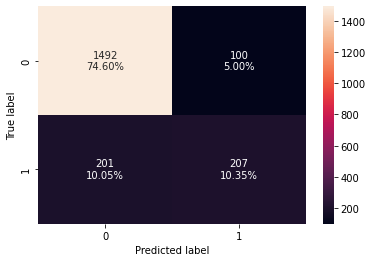

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

***

<font color=orange>

## **38. Deep Neural Network -- Model "A"**</font>

* <font color=#0e92ea>Model A:</font> <span style='color:darkblue'>a simple neural network made of five (5) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>A dropout step has been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>


<font color=orange>

## **38a. Creating Model "A"**</font>

* <font color=#0e92ea>Model "A":</font> <span style='color:darkblue'>Sequential()</span>
    
* <font color=#0e92ea>Sequential Class:</font> <span style='color:darkblue'>Keras' Sequential class starts as an empty object.</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Layers:</font> <span style='color:darkblue'>Neural Network layers are added in the next step, 38b, not this one.</span>

In [ ]:
# initailize the neural network model
model_a = Sequential(name="model_a")

<font color=orange>

## **38b. Add Neural Network Layers and Activation Functions**</font>

* <font color=#0e92ea>Model A:</font> <span style='color:darkblue'>a simple neural network made of five (5) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>A dropout step has been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Compilation:</font> <span style='color:darkblue'>Neural Network compilation occurs in the next step,  38c, not this one.</span>

In [ ]:
# input layer
model_a.add(Dense(units=16, input_dim=11, activation='relu'))

# hidden layer
model_a.add(Dense(units=24, activation='relu'))

# dropout regularization
model_a.add(Dropout(0.5))

# hidden layer
model_a.add(Dense(24, activation='relu'))

# hidden layer
model_a.add(Dense(24, activation='relu'))

# outer layer (activation function for binary classification)
model_a.add(Dense(1, activation='sigmoid'))

<font color=orange>

## **38c. Compile Model "A"**</font>

* <font color=#0e92ea>Compiling:</font> <span style='color:darkblue'>Compiling a neural network model occurs before training it.</span>
    
* <font color=#0e92ea>Loss Function:</font> <span style='color:darkblue'>Binary Cross Entropy</span>
    
* <font color=#0e92ea>Optimizer:</font> <span style='color:darkblue'>Adam</span>



In [ ]:
# add learning rate to the Adam optimizer
model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<font color=orange>

## **38d. Summary of Model "A"**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Total Parameters:</font> <span style='color:darkblue'>1825</span>

    
* <font color=#0e92ea>Trainable Parameters:</font> <span style='color:darkblue'>1825</span>

    
* <font color=#0e92ea>Non-Trainable Parameters:</font> <span style='color:darkblue'>0</span>

In [ ]:
model_a.summary()

Model: "model_a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                192       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,825
Trainable params: 1,825
Non-trainable p

<font color=orange>

## **38e. Train Model "A" (forward and backward propagation)**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>16 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>10</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.4828 to 0.3743 over 10 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.4371 to 0.3502 over 10 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.7969 to 0.8450 over 10 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7942 to 0.8733 over 10 epochs</span>

In [ ]:
# Keras documentation: 
# Even though I created my own validation dataset, now it appears that -- as a new student -- I'm forced to use the built-in validation split in model.fit()
# Otherwise, as a new student, I do not know how to return a validation score at each epoch if/when I evaluate my model on the validation set.
# I am going to follow the MLS-2 credit card example. PS: Online/Distance learning is prohitive (and with Indian holidays, I do not want to bother Sashi Challa or anyone)
# For all of my thoroughness (I aim to learn properly), It's not fair that the **timing** of this project leaves me struggling at the end.

history = model_a.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4828 - accuracy: 0.7969 - val_loss: 0.4371 - val_accuracy: 0.7942
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.7975 - val_loss: 0.4223 - val_accuracy: 0.7942
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.7981 - val_loss: 0.4158 - val_accuracy: 0.8025
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7960 - val_loss: 0.4247 - val_accuracy: 0.8125
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8052 - val_loss: 0.4109 - val_accuracy: 0.8250
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8096 - val_loss: 0.3853 - val_accuracy: 0.8317
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8165 - val_loss: 0.3733 - val_accuracy: 0.8433
Epoch 

<font color=orange>

## **38f. Plot Training Loss and Compile Model "A"**</font>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on Training Set.</span>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on "built-in" Validation Set.</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Scale:</font> <span style='color:darkblue'>0.36 to 0.48</span>

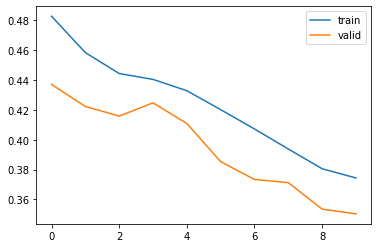

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

<font color=orange>

## **38g. Evaluate Model "A"**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>16</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Loss on (non-built-in) validation set:</font> <span style='color:darkblue'>0.3739 **(< 0.3743 Training Loss)**</span>
* <font color=#0e92ea>Loss on test set:</font> <span style='color:darkblue'>0.3793 **(> 0.3743 Training Loss)**</span>
* <font color=#0e92ea>Accuracy on (non-built-in) validation set:</font> <span style='color:darkblue'>0.8440 **(< 0.8450 Traing Accuracy)**</span>
* <font color=#0e92ea>Accuracy on test set:</font> <span style='color:darkblue'>0.8500**(> 0.8450 Traing Accuracy)**</span>

In [ ]:
skill_validation = model_a.evaluate(X_val, y_val, batch_size=16)

125/125 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8440


In [ ]:
skill_test = model_a.evaluate(X_test, y_test, batch_size=16)

125/125 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8500


In [ ]:
# print accuracy scores
print('Non-Built-In Validation Scores:', skill_validation)
print('\n')
print('Test Scores:', skill_test)

Non-Built-In Validation Scores: [0.373923122882843, 0.843999981880188]


Test Scores: [0.3792661726474762, 0.8500000238418579]


<font color=orange>

## **38h. Confusion Matrix**</font>

* <font color=#0e92ea>Recall:</font> <span style='color:darkblue'>0.462</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>False Negative:</font> <span style='color:darkblue'>10.95% (**> Random Forest Type II Error of 10.05% listed above**)</span>
* <font color=#0e92ea>False Positive:</font> <span style='color:darkblue'>4.05%</span>
* <font color=#0e92ea>True Negative:</font> <span style='color:darkblue'>75.60%</span>
* <font color=#0e92ea>True Positive:</font> <span style='color:darkblue'>9.40%</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Actually Exited:</font> <span style='color:darkblue'>There are 407 actual Exited Customers in the testing dataset, however **Model "A" failed to detect 219** of these. As well, 81 real/regular/current customers were errantly detected as having Exited (Type I Error).</span>

* <font color=#0e92ea>Reduce Number of False Negatives:</font> <span style='color:darkblue'>Build Model "B"</span>

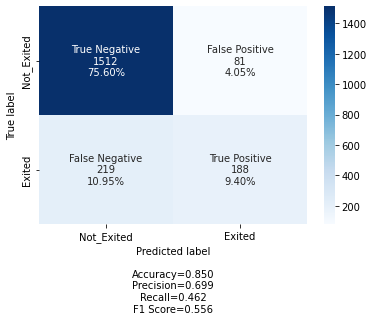

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model_a.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

***

<font color=orange>

## **39. Deep Neural Network -- Model "B"**</font>

* <font color=#0e92ea>Model B:</font> <span style='color:darkblue'>A neural network made of three (3) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>Two (2) dropout step have been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>

* <font color=#0e92ea>Early Stopping Regularization:</font> <span style='color:darkblue'>Model "B" is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or shows no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.The model at the time that training is stopped will be used and is known to have good generalization performance.</span>

* <font color=#0e92ea>Weight Initialization - he_normal:</font> <span style='color:darkblue'>Model "B" is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or shows no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.The model at the time that training is stopped will be used and is known to have good generalization performance.</span>

<font color=orange>

## **39a. Create & Compile & Train Model "B" (forward and backward propagation)**</font>

* <font color=#0e92ea>Loss Function:</font> <span style='color:darkblue'>Binary Cross Entropy</span>
    
* <font color=#0e92ea>Optimizer:</font> <span style='color:darkblue'>Adam (Learning Rate: 0.001)</span>

****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>700 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>40</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.9901 to 0.4504 over 40 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.6030 to 0.4033 over 40 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.8519 to 0.8117 over 40 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.8767 to 0.8383 over 40 epochs</span>

****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>600 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>30</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.8569 to 0.4607 over 30 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.5134 to 0.3995 over 30 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.5821 to 0.8021 over 30 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7842 to 0.8300 over 30 epochs</span>

*****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>60 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>20</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.9157 to 0.4116 over 20 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.4542 to 0.3716 over 20 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.6221 to 0.8306 over 20 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7925 to 0.8450 over 20 epochs</span>
*****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>512 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>50</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.8212 to 0.4277 over 50 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.5532 to 0.3757 over 50 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.6160 to 0.8202 over 50 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7933 to 0.8633 over 50 epochs</span>

In [ ]:
#add earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                             verbose=0, 
                             mode='min', 
                             restore_best_weights= True)
model_b = Sequential(name="model_b")
#Initializing the weights uisng hue_normal 
model_b.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model_b.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])



# Keras documentation: 
# Even though I created my own validation dataset, now it appears that -- as a new student -- I'm forced to use the built-in validation split in model.fit()
# Otherwise, as a new student, I do not know how to return a validation score at each epoch if/when I evaluate my model on the validation set.
# I am going to follow the MLS-2 credit card example. PS: Online/Distance learning is prohitive (and with Indian holidays, I do not want to bother Sashi Challa or anyone)
# For all of my thoroughness (I aim to learn properly), It's not fair that the **timing** of this project leaves me struggling at the end.

history_b= model_b.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=50, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/50
10/10 [==============================] - 1s 25ms/step - loss: 0.8212 - accuracy: 0.6160 - val_loss: 0.5532 - val_accuracy: 0.7933
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.7261 - accuracy: 0.7185 - val_loss: 0.5338 - val_accuracy: 0.7942
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.7400 - val_loss: 0.4964 - val_accuracy: 0.7942
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.7442 - val_loss: 0.4739 - val_accuracy: 0.7958
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6011 - accuracy: 0.7427 - val_loss: 0.4626 - val_accuracy: 0.7958
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5737 - accuracy: 0.7592 - val_loss: 0.4546 - val_accuracy: 0.7958
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5632 - accuracy: 0.7565 - val_loss: 0.4486 - val_accuracy: 0.7967
Epoch 8/50
10/10 [=

<font color=orange>

## **39b. Plot Training Loss and Compile Model "B"**</font>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on Training Set.</span>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on "built-in" Validation Set.</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Scale:</font> <span style='color:darkblue'>0.4 to 0.8</span>

* <font color=#0e92ea>Convergence:</font> <span style='color:darkblue'>Very nice plot of training and validation.</span>

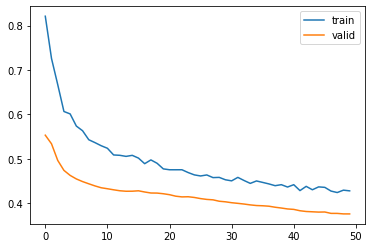

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_b.history)
hist['epoch'] = history_b.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

<font color=orange>

## **39c. Evaluate Model "B"**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>512</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Loss on (non-built-in) validation set:</font> <span style='color:darkblue'>0.3739 **(< 0.4277 Training Loss)**</span>
* <font color=#0e92ea>Loss on test set:</font> <span style='color:darkblue'>0.3793 **(< 0.4277 Training Loss)**</span>
* <font color=#0e92ea>Accuracy on (non-built-in) validation set:</font> <span style='color:darkblue'>0.8440 **(> 0.8202 Traing Accuracy)**</span>
* <font color=#0e92ea>Accuracy on test set:</font> <span style='color:darkblue'>0.8500 **(> 0.8202 Traing Accuracy)**/span>

In [ ]:
skill_b_validation = model_a.evaluate(X_val, y_val, batch_size=512)

4/4 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.8440


In [ ]:
skill_b_test = model_a.evaluate(X_test, y_test, batch_size=512)

4/4 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8500


In [ ]:
# print accuracy scores
print('Non-Built-In Validation Scores:', skill_b_validation)
print('\n')
print('Test Scores:', skill_b_test)

Non-Built-In Validation Scores: [0.3739232122898102, 0.843999981880188]


Test Scores: [0.3792661726474762, 0.8500000238418579]


<font color=orange>

## **39d. Confusion Matrix**</font>

* <font color=#0e92ea>Recall:</font> <span style='color:darkblue'>0.275 (**No matter what new epoch batch combination I use, the recall decreased (got worse)**</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>False Negative:</font> <span style='color:darkblue'>14.75% (**> Model "A" Type II Error of 10.95% listed above**)</span>
* <font color=#0e92ea>False Positive:</font> <span style='color:darkblue'>1.05%</span>
* <font color=#0e92ea>True Negative:</font> <span style='color:darkblue'>78.60%</span>
* <font color=#0e92ea>True Positive:</font> <span style='color:darkblue'>5.60%</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Actually Exited:</font> <span style='color:darkblue'>There are 407 actual Exited Customers in the testing dataset, however **Model "B" failed to detect 295** of these. As well, 21 real/regular/current customers were errantly detected as having Exited (Type I Error).</span>

* <font color=#0e92ea>Reduce Number of False Negatives:</font> <span style='color:darkblue'>Try "weighted loss" for the imbalanced dataset on Model "A"</span>

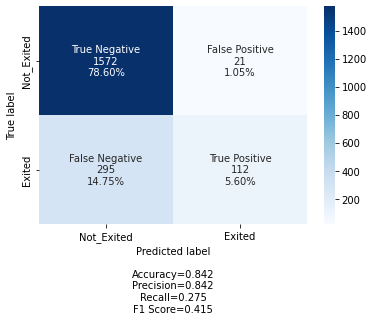

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model_b.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

***

<font color=orange>

## **40. Weighted Loss**</font>

* <font color=#0e92ea>Class Imbalance:</font> <span style='color:darkblue'> On Model "A", address the class imbalance by giving additional weight to the loss associated to errors that were made on Exited detections.</span>
  
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>CLASS 0 WEIGHT:</font> <span style='color:darkblue'>0.6278777731268314 -- Optimal Value of the Threshold. Use Threshold to covert probabilites into labels.</span>

* <font color=#0e92ea>CLASS 1 WEIGHT:</font> <span style='color:darkblue'>2.454991816693944 -- Optimal Value of the Threshold. Use Threshold to covert probabilites into labels.</span>

* <font color=#0e92ea>TEST Recall:</font> <span style='color:darkblue'>0.717</span>

* <font color=#0e92ea>TEST Loss:</font> <span style='color:darkblue'>0.4939</span>

* <font color=#0e92ea>Type II Error:</font> <span style='color:darkblue'>5.75%</span>

**OPTIMAL THRESHOLD VIA WEIGHTED LOSS has increased the recall on Model "A", has decreased the loss on Model "A", and has decreased the Type II Error (False Negative) on Model "A".**

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

TypeError: ignored

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(self, 'balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

NameError: ignored

In [ ]:
# CLASS WEIGHTS
# I CANNOT BELIEVE THAT I FIGURED OUT HOW TO PROPERLY CODE COMPUTE_CLASS_WEIGHT.  I'M IMPROVING!!! :-)

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
classes = [0,1]
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model_a.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
400/400 [==============================] - 1s 3ms/step - loss: 0.5007 - accuracy: 0.7837
Epoch 2/5
400/400 [==============================] - 1s 3ms/step - loss: 0.4911 - accuracy: 0.7822
Epoch 3/5
400/400 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.7822
Epoch 4/5
400/400 [==============================] - 1s 3ms/step - loss: 0.4806 - accuracy: 0.7832
Epoch 5/5
400/400 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.7787


In [ ]:

score_weighted = model_a.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7800


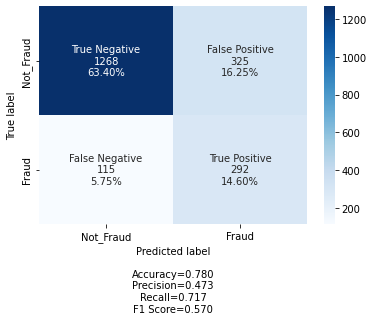

In [ ]:
## Confusion Matrix on the unseen test set
import seaborn as sn
y_pred1 = model_a.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<font color=orange>

## **41. ROC-AUC**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>ROC_AUC for Keras:</span> <span style='color:darkblue'>Great Learning did not teach us how to visualize a ROC-AUC curve with Keras.  They only taught us how to construct a ROC-AUC visualization with sklearn. I tried understanding the Keras documentation</span> 




In [ ]:
y_val_cat_prob=model_a.predict(X_val)

from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( y_val, y_val)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

<font color=orange>

## **42. SMOTE -- upsample SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>Minority Class:</span> <span style='color:darkblue'>Incease the frequency of the minority class. (Attrition Class)</span> 
    
* <span style='color:#0e92ea'>Objective:</span> <span style='color:darkblue'>Decrease False Negatives to better train the model.</span>

In [ ]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

<font color=orange>

## **43. CONCLUSION / INSIGHTS / KEY FINDINGS / RECOMMENDATIONS**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>**Recall**:</span> <span style='color:darkblue'>
    
    Recall should have increased if/when Weighted Loss and/or SMOTE were applied to Model "A". </span> 

* <span style='color:#0e92ea'>**Threshold**:</span> <span style='color:darkblue'>
    
The weights, via gradient descent,  indicate connection strengths and the threshold value determines whether or not a neuron fires. Given a training dataset, the neural network is designed in such a way that the number of neurons in the input layer is equal to the number of features. Inputs go into the first layer whose outputs are then inputs into the second layer, and so on... to a final outputs 0 or 1. This all depends upon whether or not the weighted sum of its inputs are above or below a certain threshold. A fixed network with fixed connection strengths between nodes and fixed thresholds can be used to classify inputs as 0 or 1. This network represents a classification</span> 

* <span style='color:#0e92ea'>**Upgrade Service Delivery Model**:</span> <span style='color:darkblue'>
    
    Teaching current customers the ease of convenience and the benefits of Online Banking should be the top priority of the AllLife Marketing team. By reaching out with electronic correspondences that have easy-to-spot "call-to-action" buttons, the bank can upgrade their service to current customers.  For Cluster 0, the bank can train it's brick-and-mortar personnel to engage with each customer with a focus on how to easily utilize the bank's credit card services 24/7 online, and for Cluster 2 customers, the bank's telecommunication team can be trained to walk customers through the online login and credit card features.</span> 

* <span style='color:#0e92ea'>**Hyperparameter Tuning Set Before Training**:</span> <span style='color:darkblue'>
    Number of Hidden Layers (network structure), Learning Rate (determines how the network is trained), Activation Functions, Optimize Weights, Optimize Biases, Dropout (to avoid overfitting), Batch size, Epochs
     </span> 

* <span style='color:#0e92ea'>**Bivariate Analysis and Customer Profile**:</span> <span style='color:darkblue'>
    Observations in #25 (above) reveal my understanding of how EDA can accompany DNN in classifying binary response variables. 
    ###### **EXITED CUSTOMERS BY GEOGRAPHY  (mean values):**
    
GEOGRAPHY | GENDER | AGE | CREDIT SCORE | BALANCE | TENURE | SALARY
----------|--------|-----|--------------|---------|--------|-------
Germany   | Female |44.89|    647.69    | 120,361.08|5.01|98,403.89
France    | Female |45.13|    641.91    |  71,192.80|5.00|103,439.28
Spain     | Female |44.15|    647.48    |  72,513.35|4.66|103,629.55
     </span> 